In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [14]:
data = pd.read_csv('ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [18]:
# Удаление неинформативных признаков
df = data.drop(columns=['salary', 'salary_currency', 'Unnamed: 0'])

# Сохранение очищенного датасета
df.to_csv('cleaned_dataset.csv', index=False)

# Проверка результата
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [19]:
# Получение основных статистических характеристик
statistics = df.describe()

# Вывод результатов
print(statistics)

         work_year  salary_in_usd  remote_ratio
count   607.000000     607.000000     607.00000
mean   2021.405272  112297.869852      70.92257
std       0.692133   70957.259411      40.70913
min    2020.000000    2859.000000       0.00000
25%    2021.000000   62726.000000      50.00000
50%    2022.000000  101570.000000     100.00000
75%    2022.000000  150000.000000     100.00000
max    2022.000000  600000.000000     100.00000


In [20]:
# Проверка на наличие пропусков
missing_values = df.isnull().sum()

# Вывод количества пропусков по столбцам
print("Количество пропусков в каждом столбце:")
print(missing_values)


Количество пропусков в каждом столбце:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [21]:
# Проверка на наличие дубликатов
duplicate_rows = df.duplicated().sum()

# Вывод количества дубликатов
print(f"Количество дубликатов: {duplicate_rows}")

Количество дубликатов: 42


In [22]:
# Классификация признаков
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Вывод результатов
print("Числовые признаки:")
print(numerical_features)

print("\nКатегориальные признаки:")
print(categorical_features)

Числовые признаки:
['work_year', 'salary_in_usd', 'remote_ratio']

Категориальные признаки:
['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']


C:\Users\vorob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vorob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vorob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


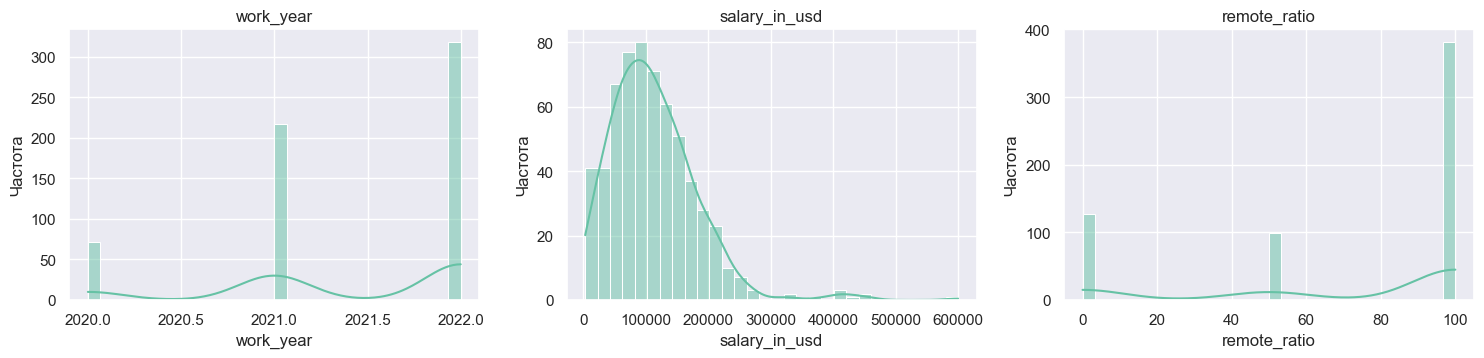

In [23]:
# Классификация признаков
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Построение гистограмм для числовых признаков
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)  # Подгонка под 3x3 сетку
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

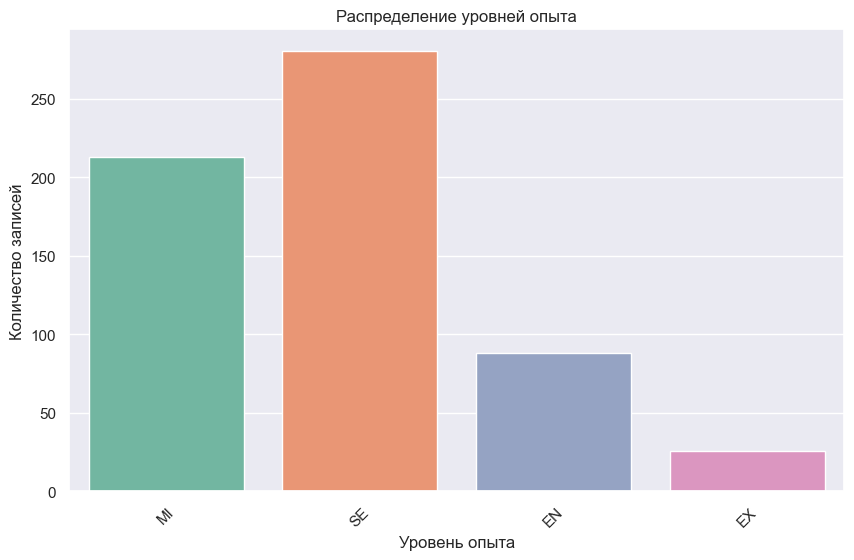

In [25]:
# Визуализация для experience_level
plt.figure(figsize=(10, 6))
sns.countplot(x='experience_level', data=df)
plt.title('Распределение уровней опыта')
plt.xlabel('Уровень опыта')
plt.ylabel('Количество записей')
plt.xticks(rotation=45)
plt.show()

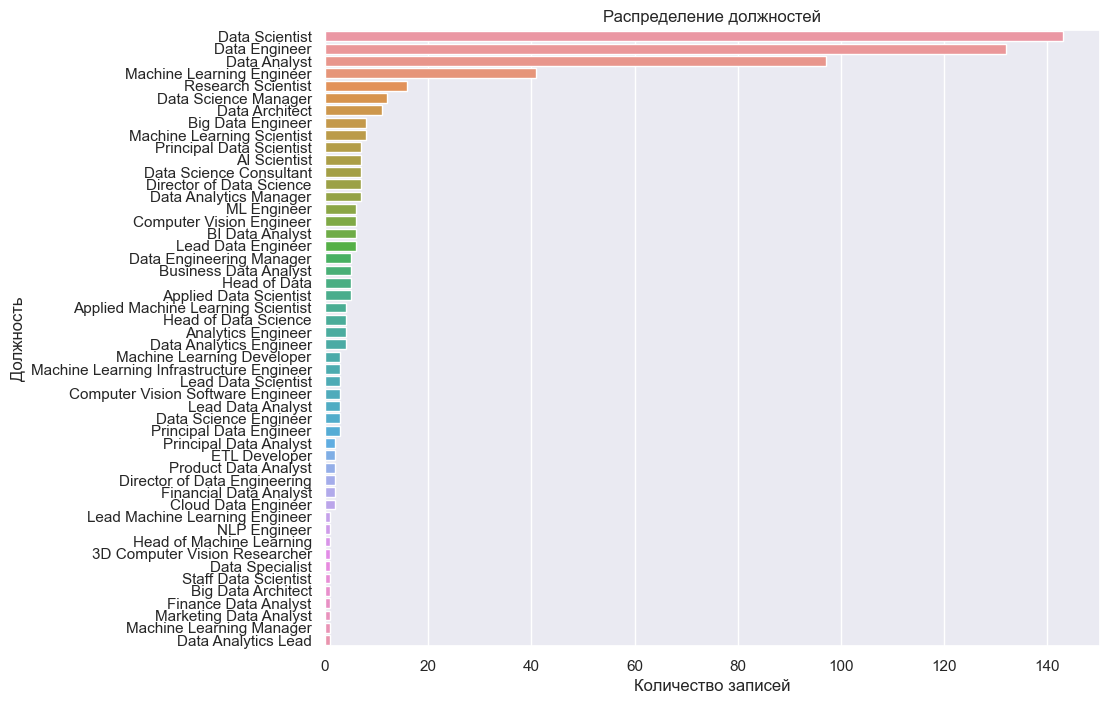

In [26]:
# Визуализация для job_title
plt.figure(figsize=(10, 8))
sns.countplot(y='job_title', data=df, order=df['job_title'].value_counts().index)
plt.title('Распределение должностей')
plt.xlabel('Количество записей')
plt.ylabel('Должность')
plt.show()

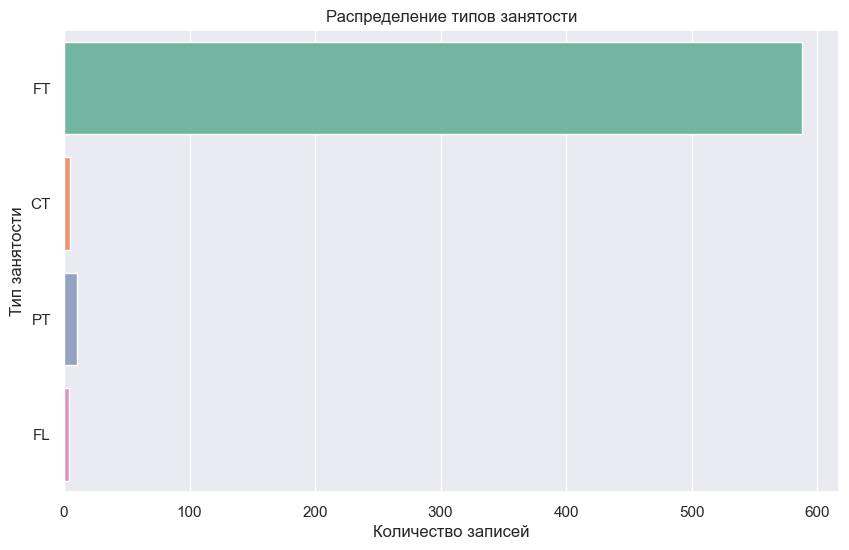

In [30]:
# Визуализация для employment_type
plt.figure(figsize=(10, 6))
sns.countplot(y='employment_type', data=df)
plt.title('Распределение типов занятости')
plt.xlabel('Количество записей')
plt.ylabel('Тип занятости')
plt.show()

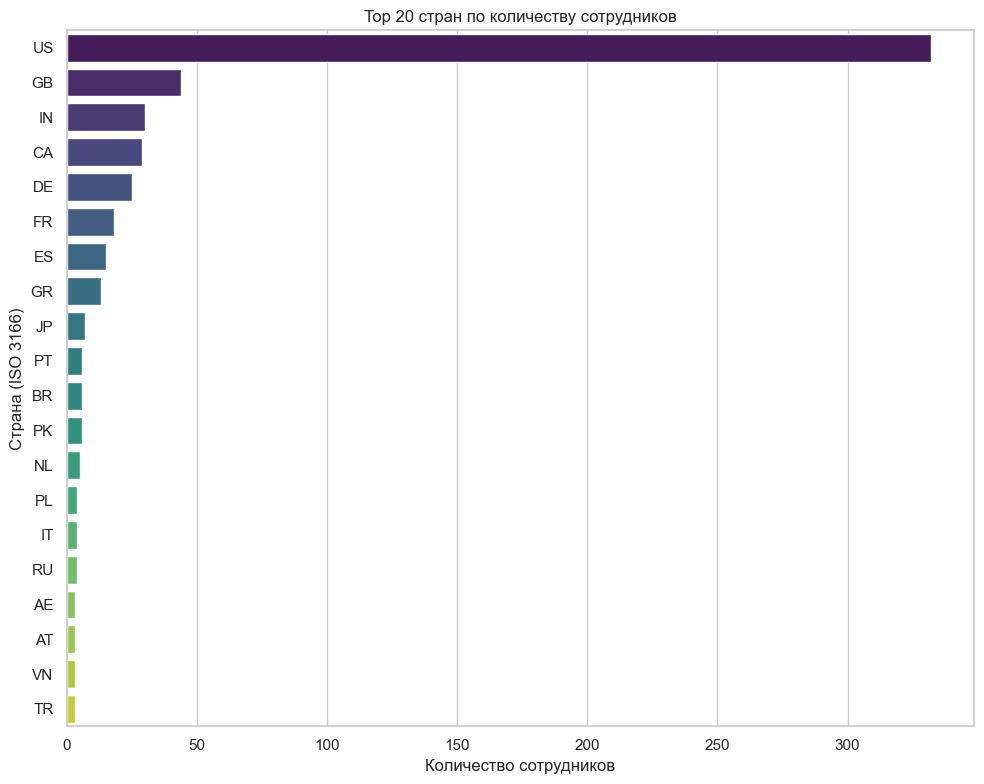

In [36]:
# Визуализация для employee_residence
sns.set(style="whitegrid")
counts = df['employee_residence'].value_counts()
top = counts.iloc[:20]   # покажем Top 20

plt.figure(figsize=(10,8))
sns.barplot(x=top.values, y=top.index, palette='viridis')
plt.xlabel('Количество сотрудников')
plt.ylabel('Страна (ISO 3166)')
plt.title('Top 20 стран по количеству сотрудников')
plt.tight_layout()


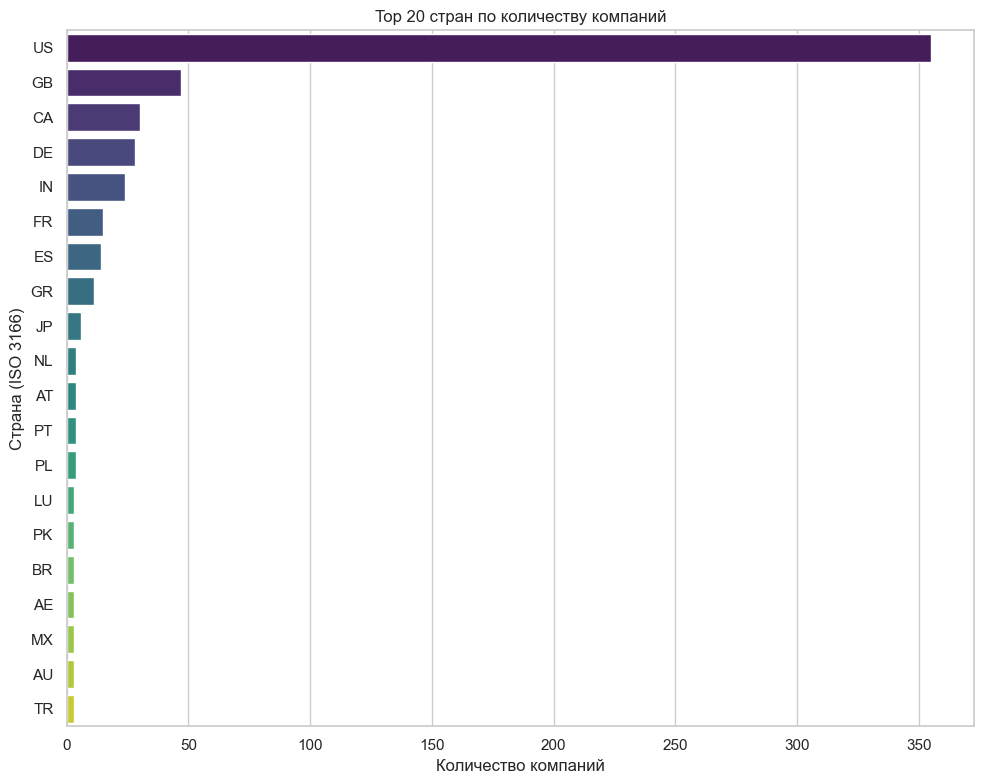

In [38]:
# Визуализация для company_location
sns.set(style="whitegrid")
counts = df['company_location'].value_counts()
top = counts.iloc[:20]   # покажем Top 20

plt.figure(figsize=(10,8))
sns.barplot(x=top.values, y=top.index, palette='viridis')
plt.xlabel('Количество компаний')
plt.ylabel('Страна (ISO 3166)')
plt.title('Top 20 стран по количеству компаний')
plt.tight_layout()

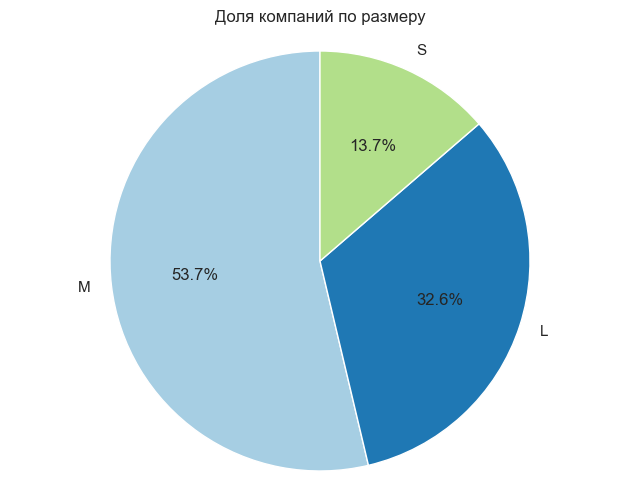

In [40]:
# Визуализация для company_size
# Подсчет количества компаний в каждой категории
size_counts = df['company_size'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Доля компаний по размеру')
plt.axis('equal')  # Чтобы круг был кругом
plt.show()

           count    median           mean           std
work_year                                              
2020          24   72693.0   94110.083333  79835.004470
2021          54   78842.0   86774.722222  70886.446192
2022          81  140000.0  140270.679012  59912.054761


C:\Users\vorob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vorob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


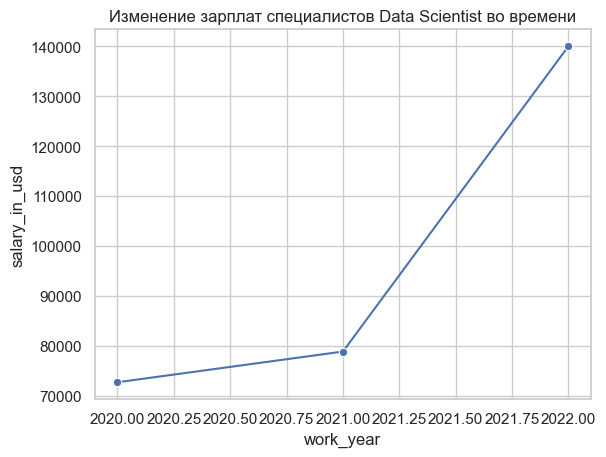

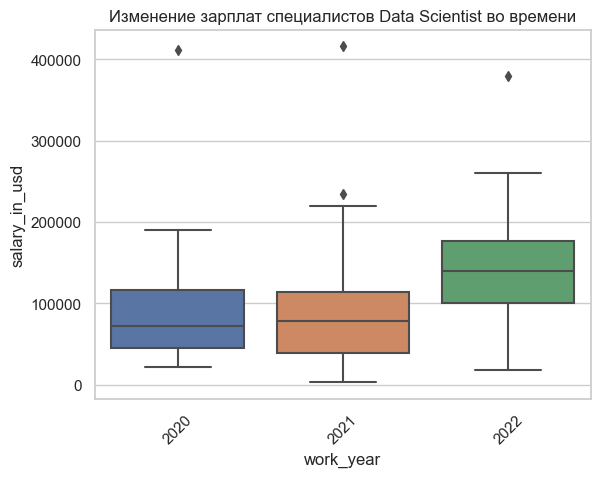

In [127]:
df_ds = df[df['job_title_norm'].str.contains('data scientist', case=False, na=False)]
summary = df_ds.groupby('work_year')['salary_in_usd'].agg(['count','median','mean','std'])
print(summary)
sns.lineplot(data=df_ds.groupby('work_year')['salary_in_usd'].median().reset_index(),
             x='work_year', y='salary_in_usd', marker='o')
plt.title('Изменение зарплат специалистов Data Scientist во времени')
plt.show()

sns.boxplot(x='work_year', y='salary_in_usd', data=df_ds)
plt.title('Изменение зарплат специалистов Data Scientist во времени')
plt.xticks(rotation=45)
plt.show()


C:\Users\vorob\AppData\Local\Temp\ipykernel_15912\1942815639.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22 = df22[mask_ds | mask_de]
C:\Users\vorob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vorob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


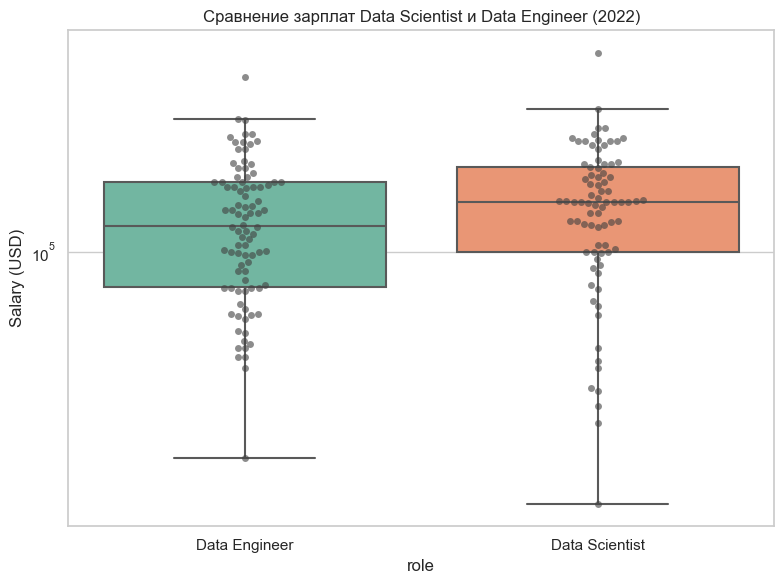

In [50]:
# Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
# нормализуем job_title (если есть вариации)
df['job_title_norm'] = df['job_title'].str.lower()
# простая фильтрация по ключевым словам
mask_ds = df['job_title_norm'].str.contains('data scientist', na=False)
mask_de = df['job_title_norm'].str.contains('data engineer|big data engineer', na=False)

# фильтр по 2022 и нужным должностям
df22 = df[df['work_year'] == 2022].copy()
df22 = df22[mask_ds | mask_de]

# пометим категорию
df22['role'] = np.where(df22['job_title_norm'].str.contains('data scientist', na=False), 'Data Scientist', 'Data Engineer')

sns.set_style('whitegrid')
plt.figure(figsize=(8,6))

ax = sns.boxplot(x='role', y='salary_in_usd', data=df22, showfliers=False, palette='Set2')
# добавим точки
sns.swarmplot(x='role', y='salary_in_usd', data=df22, color='.25', alpha=0.6)

ax.set_yscale('log')   # опционально: если распределение сильно скошено
ax.set_ylabel('Salary (USD)')
ax.set_title('Сравнение зарплат Data Scientist и Data Engineer (2022)')


plt.tight_layout()
plt.show()

C:\Users\vorob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vorob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


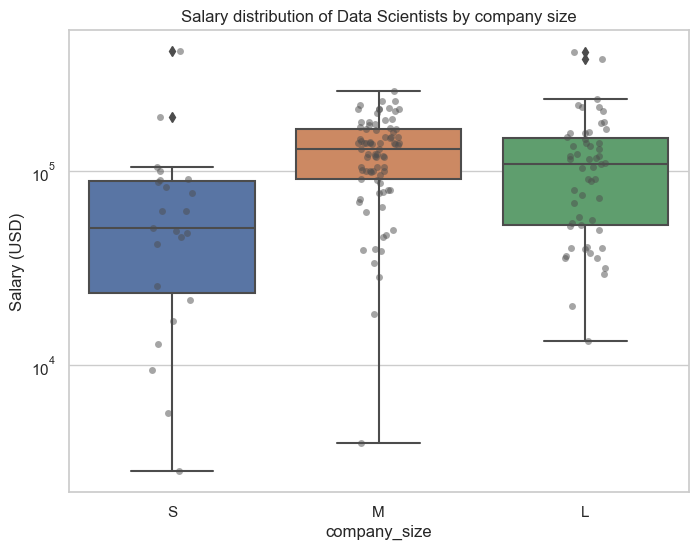

In [49]:
# Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
# фильтруем строки, где в job_title есть "Data Scientist" 
ds = df[df['job_title'].str.contains('Data Scientist', case=False, na=False)].copy()
plt.figure(figsize=(8,6))
sns.boxplot(x='company_size', y='salary_in_usd', data=ds, order=['S','M','L'])
sns.stripplot(x='company_size', y='salary_in_usd', data=ds, color='0.3', alpha=0.5, order=['S','M','L'])
plt.ylabel('Salary (USD)')
plt.title('Salary distribution of Data Scientists by company size')
plt.yscale('log')  # опционально: лог-шкала, если есть сильные выбросы
plt.show()

company_size
M    187
L    121
S     42
Name: count, dtype: int64
job_cat       Data Engineer  Data Scientist
company_size                               
L                        50              71
M                        94              93
S                        14              28
job_cat       Data Engineer  Data Scientist
company_size                               
L                  0.413223        0.586777
M                  0.502674        0.497326
S                  0.333333        0.666667


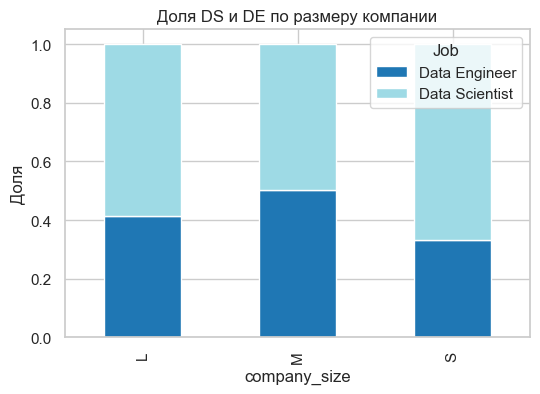

In [82]:
# Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

# создаём категорию: Data Scientist, Data Engineer, прочие (при необходимости)
def classify(title):
    if "data scientist" in title or "data science" in title:
        return "Data Scientist"
    if "data engineer" in title or "big data engineer" in title:
        return "Data Engineer"
    return "Other"

df['job_cat'] = df['job_title_norm'].apply(classify)

# оставим только интересующие категории (опционально)
df_de_ds = df[df['job_cat'].isin(["Data Scientist","Data Engineer"])].copy()

# посмотрите распределение по company_size
print(df_de_ds['company_size'].value_counts())
# частоты
ct = pd.crosstab(df_de_ds['company_size'], df_de_ds['job_cat'])
print(ct)

# доли по строкам (какая доля в каждой группе company_size — DS/DE)
ct_rownorm = ct.div(ct.sum(axis=1), axis=0)
print(ct_rownorm)
# 1) нормализованный stacked bar (с помощью pandas)
ax = ct_rownorm.plot(kind='bar', stacked=True, figsize=(6,4), colormap='tab20')
plt.ylabel('Доля')
plt.title('Доля DS и DE по размеру компании')
plt.legend(title='Job')


C:\Users\vorob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

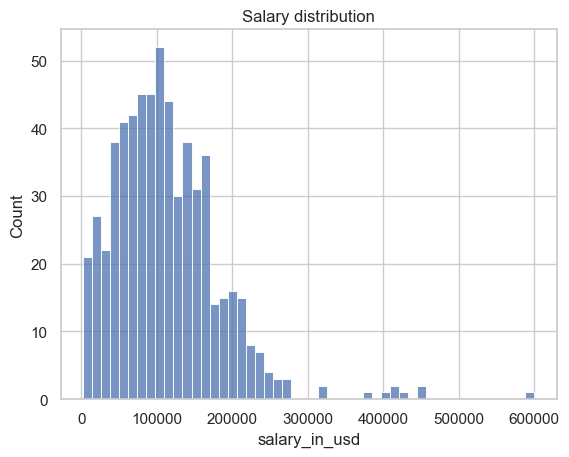

<Figure size 640x480 with 0 Axes>

In [58]:
# Общая проверка распределения
plt.figure()
sns.histplot(df['salary_in_usd'], bins=50)
plt.title('Salary distribution')
plt.figure()
 

Text(0.5, 1.0, 'Salary by experience level')

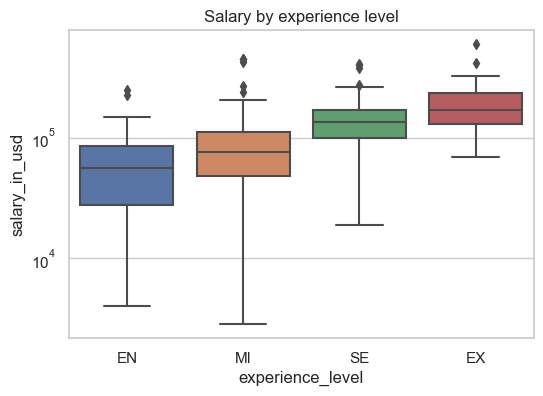

In [59]:
# Зависимость зарплаты от опыта работы
plt.figure(figsize=(6,4))
order = ['EN','MI','SE','EX']  # порядок, если нужно
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=order)
plt.yscale('log')  # если сильно скошено
plt.title('Salary by experience level')

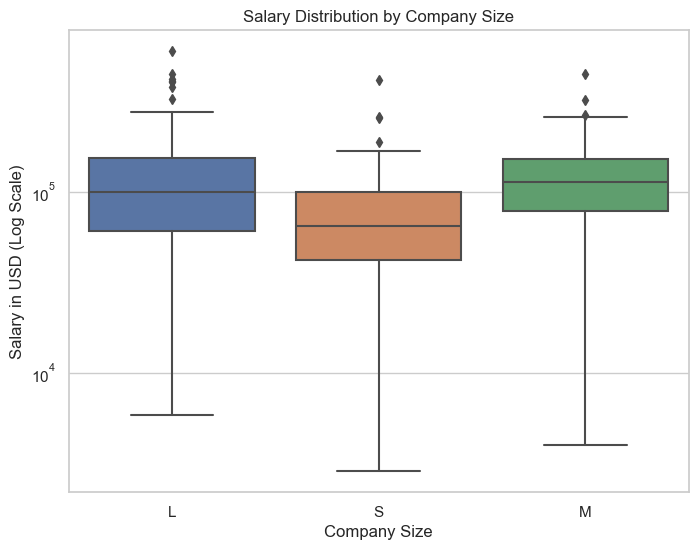

In [62]:
# Зависимость зарплаты от размера компании
plt.figure(figsize=(8, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.yscale('log')  # Если распределение зарплат сильно скошено
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD (Log Scale)')
plt.show()

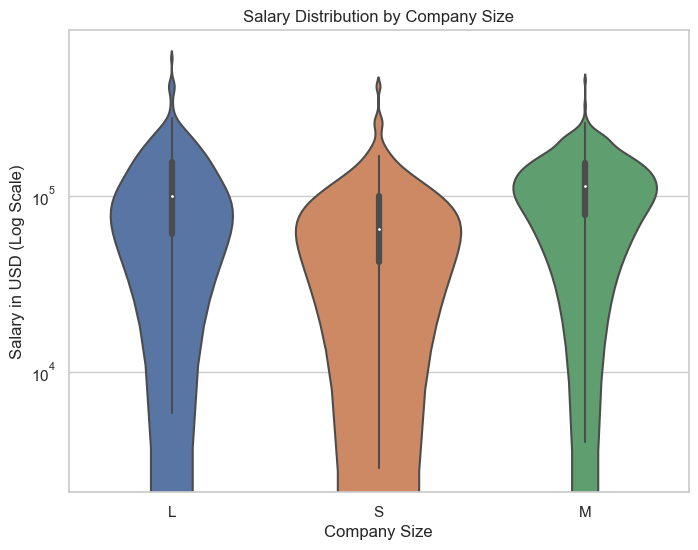

In [63]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='company_size', y='salary_in_usd', data=df)
plt.yscale('log')  # Если необходимо
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD (Log Scale)')
plt.show()

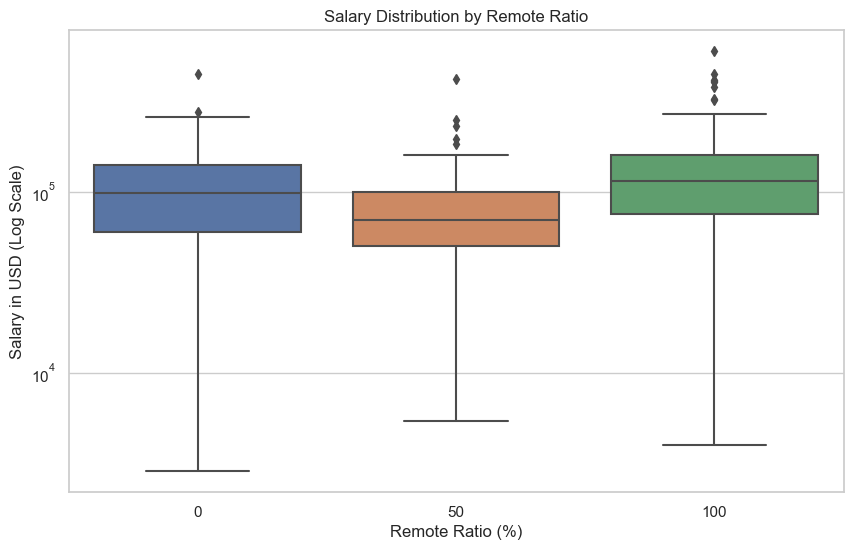

In [66]:
# Зависимость зарплаты от общего объема работы выполненного удаленно
plt.figure(figsize=(10, 6))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.yscale('log')  # Если необходимо
plt.title('Salary Distribution by Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary in USD (Log Scale)')
plt.show()

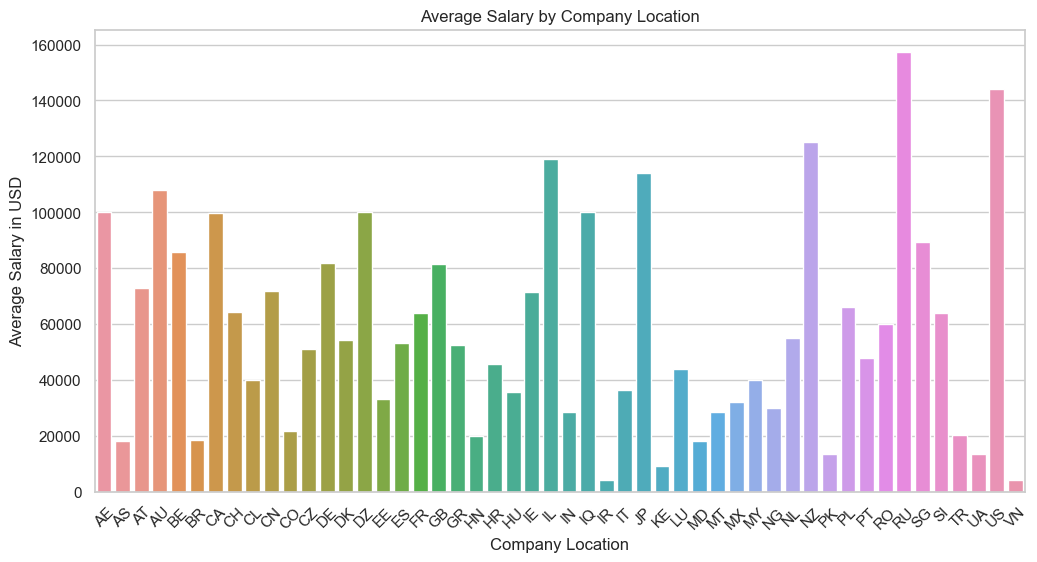

In [69]:
# Зависимость зарплаты от местоположения компании
plt.figure(figsize=(12, 6))
mean_salary = df.groupby('company_location')['salary_in_usd'].mean().reset_index()
sns.barplot(x='company_location', y='salary_in_usd', data=mean_salary)
plt.xticks(rotation=45)  # Поворачиваем метки по оси X
plt.title('Average Salary by Company Location')
plt.xlabel('Company Location')
plt.ylabel('Average Salary in USD')
plt.show()

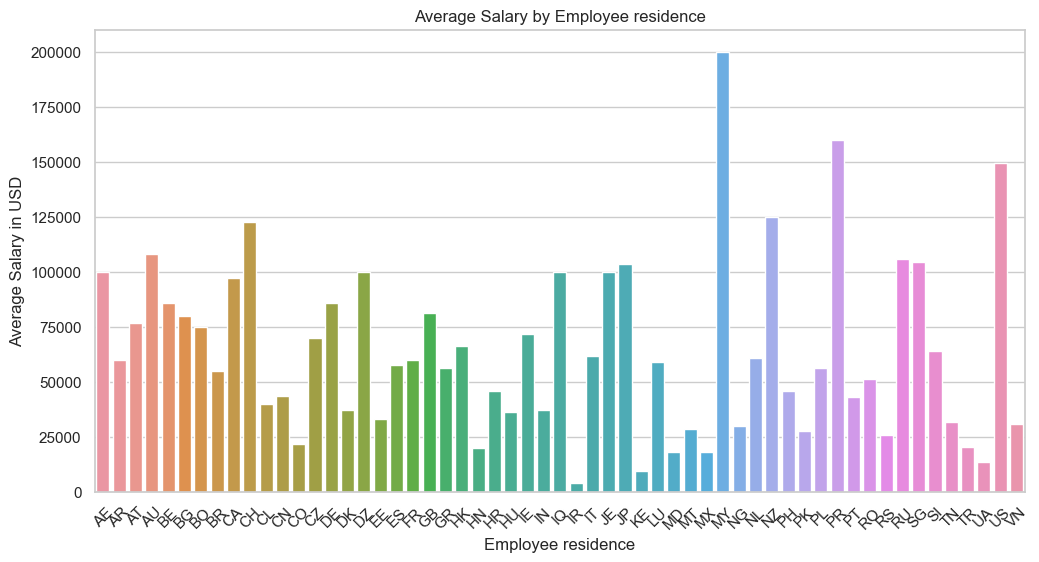

In [73]:
# Зависимость зарплаты от местоположения компании
plt.figure(figsize=(12, 6))
mean_salary = df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()
sns.barplot(x='employee_residence', y='salary_in_usd', data=mean_salary)
plt.xticks(rotation=45)  # Поворачиваем метки по оси X
plt.title('Average Salary by Employee residence')
plt.xlabel('Employee residence')
plt.ylabel('Average Salary in USD')
plt.show()

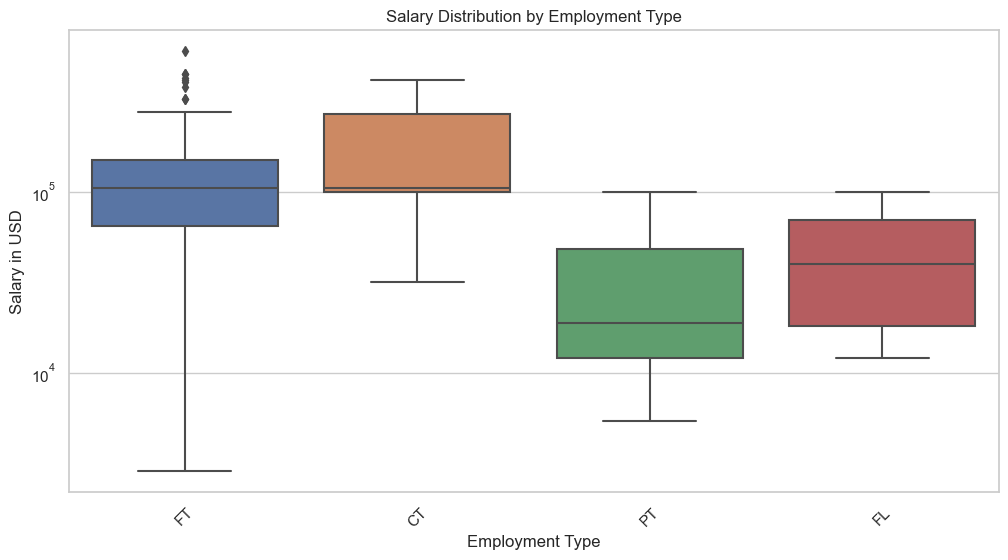

In [74]:
# Зависимость зарплаты от типа трудоустройства
plt.figure(figsize=(12, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшей читаемости
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.yscale('log')  # Если распределение зарплат сильно скошено
plt.show()

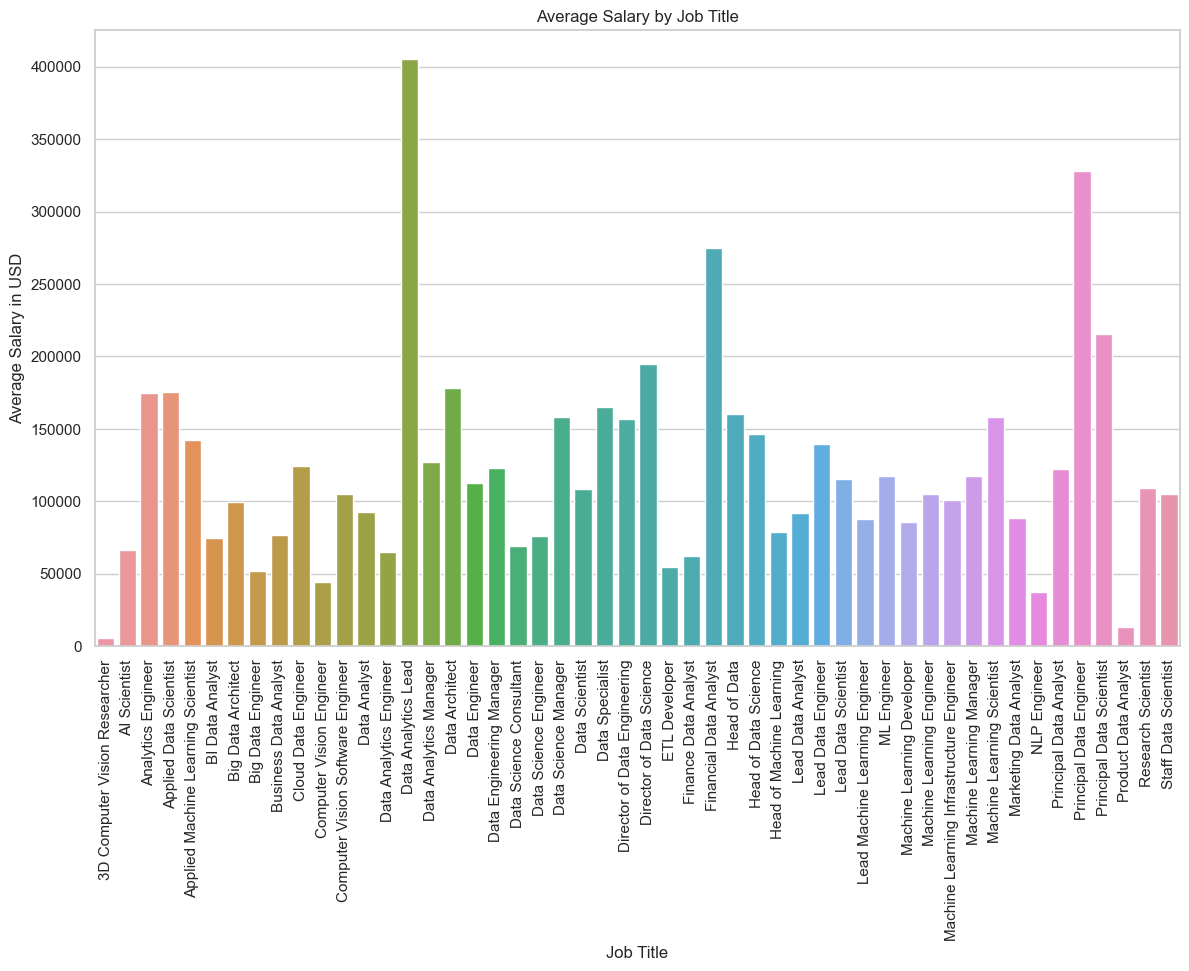

In [76]:
# Зависимость зарплаты от занимаемой должности
plt.figure(figsize=(14, 8))
mean_salary = df.groupby('job_title')['salary_in_usd'].mean().reset_index()
sns.barplot(x='job_title', y='salary_in_usd', data=mean_salary)
plt.xticks(rotation=90)  # Поворачиваем метки по оси X
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.show()


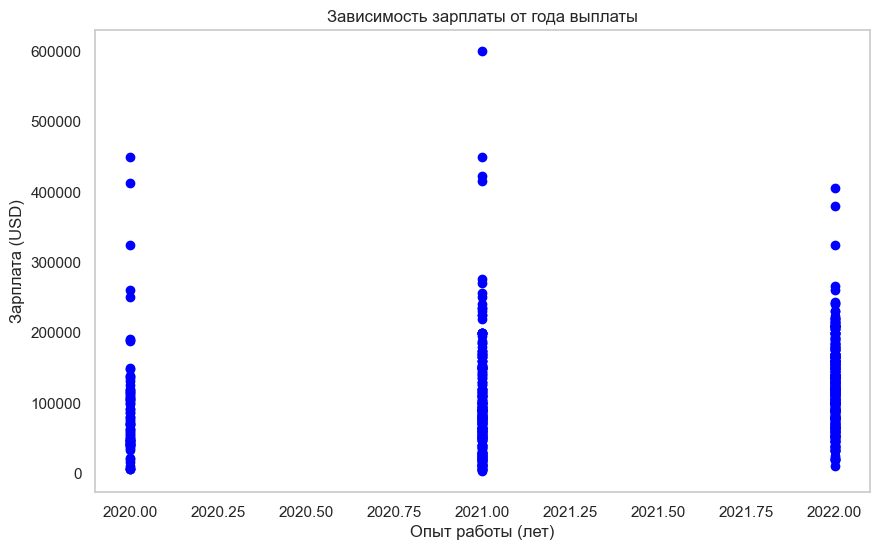

In [85]:
# Зависимость зарплаты от года выплаты
plt.figure(figsize=(10, 6))
plt.scatter(df['work_year'], df['salary_in_usd'], color='blue')
plt.title('Зависимость зарплаты от года выплаты')
plt.xlabel('Опыт работы (лет)')
plt.ylabel('Зарплата (USD)')
plt.grid()
plt.show()


# Предварительные выводы о факторах, оказывающих влияние на размер заработной платы
Безусловное влияние на размер зарплаты оказывают уровень опыта специалиста (experience_level), тип трудоустройства (employment_type), занимаемая должность (job_title), размер компании (company_size).
В меньшей степени влияют местоположение (employee_residence, company_location), объем работы, выполненной удаленно (remote_ratio), и год выплаты (work_year).

# Первичные гипотезы по поставленным вопросам
1. Визуальный анализ показал, что зарплаты у специалистов Data Scientist растут с годами.
2. В 2022 году зарплаты специалистов Data Scientist превышали зарплаты специалистов Data Engineer.
3. Наиболее высокие зарплаты получали специалисты Data Scientist, работающие в средних компаниях. Наименьшие - в небольших компаниях.
4. Согласно визуальному анализу, в средних компаниях доля специалистов Data Scientist и специалистов Data Engineer приблизительно равны друг другую.
В малых и крупных компаних доля специалистов Data Engineer больше, чем доля специалистов Data Scientist

# Статистический анализ

# Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist? 
Нулевая гипотеза (H0): Средняя зарплата специалистов Data Scientist не изменяется со временем (рост зарплат отсутствует). 
H₀: β = 0
Альтернативная гипотеза (H1): Средняя зарплата специалистов Data Scientist увеличивается со временем (рост зарплат присутствует).
H₁: β > 0


In [88]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_norm,role,job_title_clean,job_cat
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,data scientist,Data Scientist,data scientist,Data Scientist
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,machine learning scientist,Data Engineer,machine learning scientist,Other
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,big data engineer,Data Engineer,big data engineer,Data Engineer
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,product data analyst,Data Engineer,product data analyst,Other
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,machine learning engineer,Data Engineer,machine learning engineer,Other


2020 24 (0.6909313797950745, 7.660838491574395e-06)


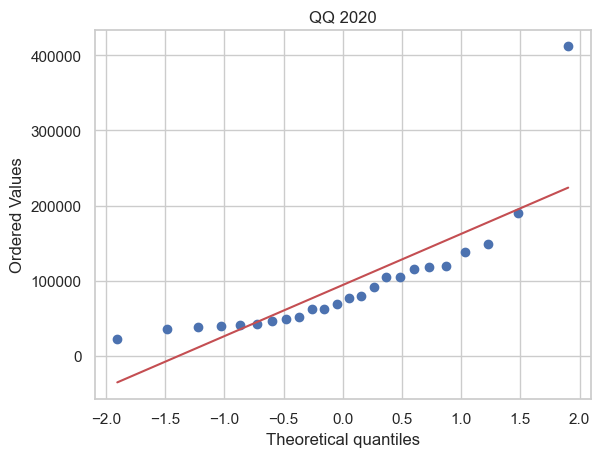

2021 54 (0.836702823638916, 3.4368802062090253e-06)


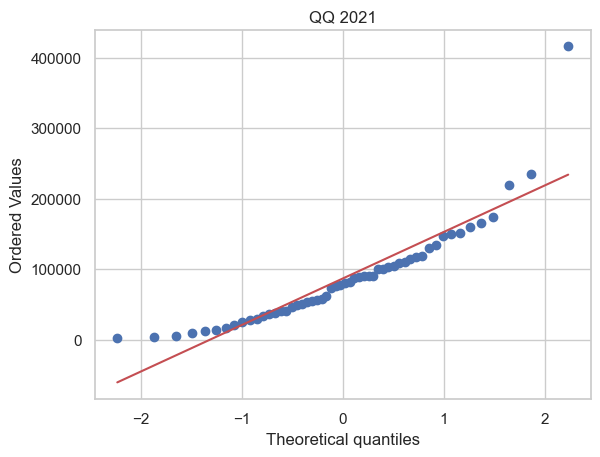

2022 81 (0.961117148399353, 0.014822538942098618)


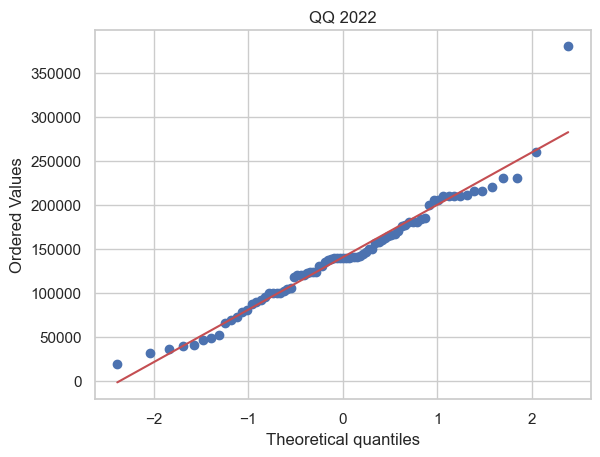

In [92]:
# Проверка данных на нормальность
from scipy.stats import shapiro

from scipy import stats
for year, group in df_ds.groupby('work_year'):
    arr = group['salary_in_usd'].dropna()
    print(year, len(arr), stats.shapiro(arr)[:2])  
    stats.probplot(arr, dist="norm", plot=plt)
    plt.title(f'QQ {year}')
    plt.show()



In [93]:
df_ds.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_norm,role,job_title_clean,job_cat
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,data scientist,Data Scientist,data scientist,Data Scientist
6,2020,SE,FT,Lead Data Scientist,190000,US,100,US,S,lead data scientist,Data Scientist,lead data scientist,Data Scientist
7,2020,MI,FT,Data Scientist,35735,HU,50,HU,L,data scientist,Data Scientist,data scientist,Data Scientist
10,2020,EN,FT,Data Scientist,51321,FR,0,FR,S,data scientist,Data Scientist,data scientist,Data Scientist
11,2020,MI,FT,Data Scientist,40481,IN,0,IN,L,data scientist,Data Scientist,data scientist,Data Scientist


                    sum_sq     df          F    PR(>F)
C(work_year)  1.052176e+11    2.0  11.723095  0.000018
Residual      7.000689e+11  156.0        NaN       NaN
Результаты ANOVA статистически значимы (p-value = 0.0000), отклоняем нулевую гипотезу.


C:\Users\vorob\AppData\Local\Temp\ipykernel_15912\1814962852.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


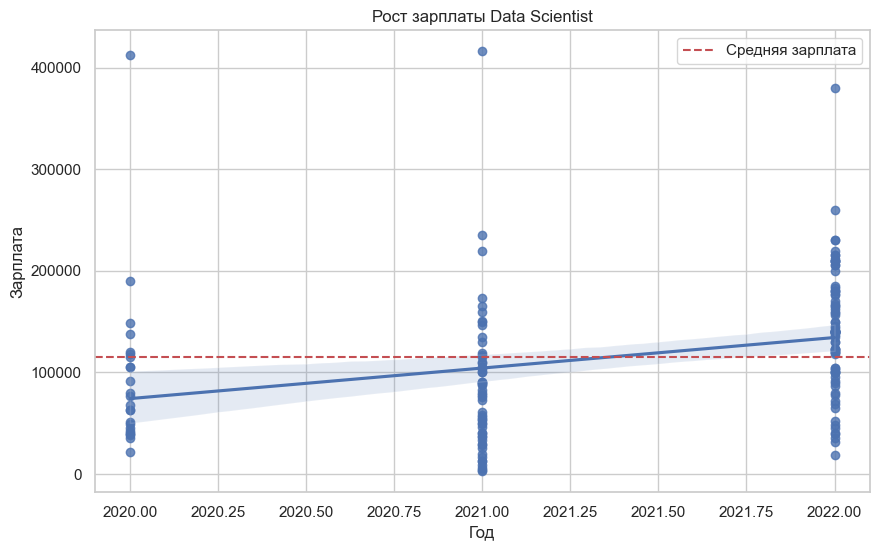

In [100]:
from statsmodels.formula.api import ols
# Уровень значимости
alpha = 0.05

# ANOVA
model = ols('salary_in_usd ~ C(work_year)', data=df_ds).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Проверка значимости
p_value = anova_table['PR(>F)'][0]
if p_value < alpha:
    print(f"Результаты ANOVA статистически значимы (p-value = {p_value:.4f}), отклоняем нулевую гипотезу.")
else:
    print(f"Результаты ANOVA не статистически значимы (p-value = {p_value:.4f}), нет оснований для отклонения нулевой гипотезы.")

# Линейная регрессия с доверительными интервалами
plt.figure(figsize=(10, 6))
sns.regplot(x='work_year', y='salary_in_usd', data=df_ds, ci=95)  
plt.xlabel('Год')
plt.ylabel('Зарплата')
plt.title('Рост зарплаты Data Scientist')
plt.axhline(y=df_ds['salary_in_usd'].mean(), color='r', linestyle='--', label='Средняя зарплата')  
plt.legend()
plt.show()

# Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
Нулевая гипотеза (H0):

Зарплаты Data Scientist и Data Engineer в 2022 году равны.  H₀: μ(DS) = μ(DE) 
где  μ_(DS)  — средняя зарплата Data Scientist, а  μ_(DE)  — средняя зарплата Data Enginee

Альтернативная гипотеза (H1)

Зарплаты Data Scientist и Data Engineer в 2022 году не равны. Это можно записать как:
 H₁: μ(DS) ≠ μ(D 
r.


In [101]:
# Проверка нормальности
ds_salaries = df22[df22['role'] == 'Data Scientist']['salary_in_usd']
de_salaries = df22[df22['role'] == 'Data Engineer']['salary_in_usd']

# Тест Шапиро-Уилка
shapiro_ds = stats.shapiro(ds_salaries)
shapiro_de = stats.shapiro(de_salaries)

print(f"Data Scientist: W={shapiro_ds.statistic}, p-value={shapiro_ds.pvalue}")
print(f"Data Engineer: W={shapiro_de.statistic}, p-value={shapiro_de.pvalue}")

# Выбор теста на основе p-value
if shapiro_ds.pvalue > 0.05 and shapiro_de.pvalue > 0.05:
    # Нормальное распределение, используем t-тест
    t_stat, p_value = stats.ttest_ind(ds_salaries, de_salaries)
    test_type = "t-тест"
else:
    # Не нормально распределены, используем тест Манна-Уитни
    u_stat, p_value = stats.mannwhitneyu(ds_salaries, de_salaries)
    test_type = "тест Манна-Уитни"

print(f"{test_type}: p-value={p_value}")


Data Scientist: W=0.961117148399353, p-value=0.014822538942098618
Data Engineer: W=0.9621403813362122, p-value=0.010158039629459381
тест Манна-Уитни: p-value=0.07626238779487092


In [103]:
# Интерпретация результатов
alpha = 0.05  # уровень значимости
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимая разница между зарплатами.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимой разницы между зарплатами.")

Не отвергаем нулевую гипотезу: нет статистически значимой разницы между зарплатами.


# Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
Нулевая гипотеза (H0):
Зарплаты специалистов Data Scientist не зависят от размера компании. 
H₀: μ(S1) = μ(S2) = μ(S3) 
где  μ_(S1) ,  μ_(S2) , и  μ_(S3)  — средние зарплаты Data Scientist в малых, средних и крупных компаниях соответственно.
Альтернативная гипотеза (H1):
Зарплаты специалистов Data Scientist зависят от размера компании. 
H₁: не все  μ(Si)  равны 
где хотя бы одна из средних зарплат в разных категориях компаний отличается

In [115]:
# Фильтрация данных по размерам компаний
small_companies = ds[ds['company_size'] == 'S']['salary_in_usd'].dropna()
medium_companies = ds[ds['company_size'] == 'M']['salary_in_usd'].dropna()
large_companies = ds[ds['company_size'] == 'L']['salary_in_usd'].dropna()

# Проверка нормальности
_, p_small = stats.shapiro(small_companies)
_, p_medium = stats.shapiro(medium_companies)
_, p_large = stats.shapiro(large_companies)

print(f'Shapiro-Wilk test for small companies: p={p_small}')
print(f'Shapiro-Wilk test for medium companies: p={p_medium}')
print(f'Shapiro-Wilk test for large companies: p={p_large}')

# Проверка равенства дисперсий
_, p_levene = stats.levene(small_companies, medium_companies, large_companies)
print(f'Levene test for equal variances: p={p_levene}')

# Проведение теста Крускала-Уоллиса
h_statistic, p_kruskal = stats.kruskal(small_companies, medium_companies, large_companies)

print(f'Kruskal-Wallis test: H-statistic={h_statistic}, p-value={p_kruskal}')

# Интерпретация результатов
if p_kruskal < 0.05:
    print("Отвергаем нулевую гипотезу: есть статистически значимые различия между группами.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимых различий между группами.")

Shapiro-Wilk test for small companies: p=3.7279683056112844e-06
Shapiro-Wilk test for medium companies: p=0.7222496867179871
Shapiro-Wilk test for large companies: p=1.5274395991582423e-05
Levene test for equal variances: p=0.28384914651927695
Kruskal-Wallis test: H-statistic=19.997730661031778, p-value=4.545147291405771e-05
Отвергаем нулевую гипотезу: есть статистически значимые различия между группами.


# Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
• Нулевая гипотеза H0: наличие должности (Data Scientist / Data Engineer) не зависит от размера компании (независимы).
• Альтернативная гипотеза H1: наличие должности и размер компании зависимы (есть связь).

In [116]:
df_de_ds.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_norm,role,job_title_clean,job_cat
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,data scientist,Data Scientist,data scientist,Data Scientist
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,big data engineer,Data Engineer,big data engineer,Data Engineer
6,2020,SE,FT,Lead Data Scientist,190000,US,100,US,S,lead data scientist,Data Scientist,lead data scientist,Data Scientist
7,2020,MI,FT,Data Scientist,35735,HU,50,HU,L,data scientist,Data Scientist,data scientist,Data Scientist
9,2020,SE,FT,Lead Data Engineer,125000,NZ,50,NZ,S,lead data engineer,Data Engineer,lead data engineer,Data Engineer


In [117]:
# 1) Контингентная таблица
ct = pd.crosstab(df_de_ds['company_size'], df_de_ds['job_cat'])
print("Контингентная таблица:\n", ct, "\n")

Контингентная таблица:
 job_cat       Data Engineer  Data Scientist
company_size                               
L                        50              71
M                        94              93
S                        14              28 



In [119]:
# задаём уровень значимости
alpha = 0.05 
# проводим тест
_, p, _, _ = stats.chi2_contingency(ct)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.080
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


# Выводы по статистическому анализу
1. Средняя зарплата специалистов Data Scientist увеличивается со временем (рост зарплат присутствует). Предварительная гипотеза подтверждена.
2. Нет статистически значимой разницы между зарплатами Data Scientist и Data Engineer в 2022 году. Предварительная гипотеза опровергнута.
3. Зарплаты специалистов Data Scientist зависят от размера компании. H₁: не все μ(Si) равны где хотя бы одна из средних зарплат в разных категориях компаний отличается. Предварительная гипотеза подтверждена.
4. Наличие должности (Data Scientist / Data Engineer) не зависит от размера компании (независимы).Предварительная гипотеза опровергнута.

# Дополнительное исследование
1. Как соотносятся зарплаты специалистов Data Scientist в зависимости от уровня опыта?
2. Влияет ли тип занятости на уровень зарплаты специалистов в области Data Science?


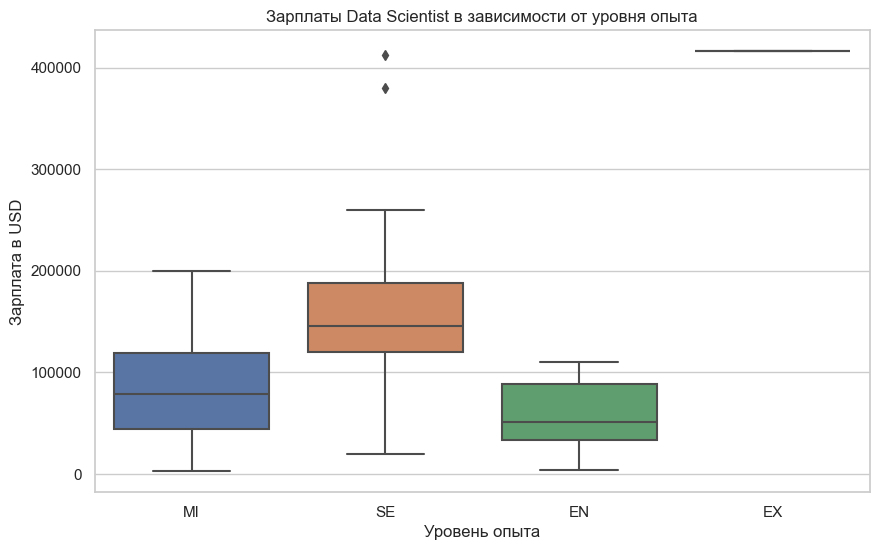

In [121]:
# Визуализация зарплат по уровням опыта
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df_ds)
plt.title('Зарплаты Data Scientist в зависимости от уровня опыта')
plt.xlabel('Уровень опыта')
plt.ylabel('Зарплата в USD')
plt.show()

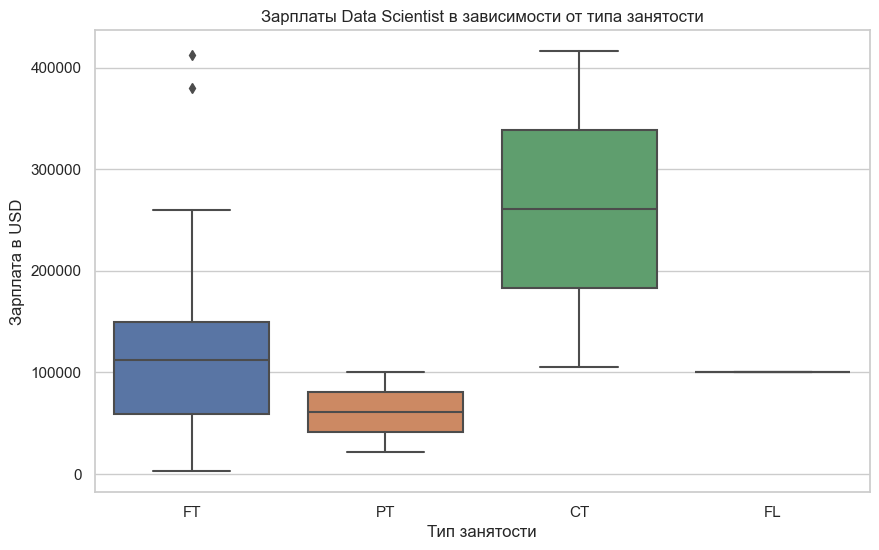

In [122]:
# Визуализация зарплат по типу занятости
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df_ds)
plt.title('Зарплаты Data Scientist в зависимости от типа занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Зарплата в USD')
plt.show()

# Предварительный вывод
Уровень зарплаты специалистов в области Data Science зависит от уровня оппыта и типа трудоустроства.

# Гипотезы
1. Как соотносятся зарплаты специалистов Data Scientist в зависимости от уровня опыта?
• Нулевая гипотеза (H0): Зарплаты специалистов Data Scientist не различаются в зависимости от уровня опыта.
• Альтернативная гипотеза (H1): Зарплаты специалистов Data Scientist различаются в зависимости от уровня опыта.
2. Влияет ли тип занятости на уровень зарплаты специалистов в области Data Science?
• Нулевая гипотеза (H0): Зарплаты специалистов Data Science не различаются в зависимости от типа занятости.
• Альтернативная гипотеза (H1): Зарплаты специалистов Data Science различаются в зависимости от типа занятости.

In [124]:
# ANOVA для зарплат по уровням опыта
anova_experience = stats.f_oneway(
    df_ds[df_ds['experience_level'] == 'EN']['salary_in_usd'],
   df_ds[df_ds['experience_level'] == 'MI']['salary_in_usd'],
    df_ds[df_ds['experience_level'] == 'SE']['salary_in_usd'],
    df_ds[df_ds['experience_level'] == 'EX']['salary_in_usd']
)

# ANOVA для зарплат по типам занятости
anova_employment = stats.f_oneway(
    df_ds[df_ds['employment_type'] == 'PT']['salary_in_usd'],
    df_ds[df_ds['employment_type'] == 'FT']['salary_in_usd'],
    df_ds[df_ds['employment_type'] == 'CT']['salary_in_usd'],
    df_ds[df_ds['employment_type'] == 'FL']['salary_in_usd']
)

alpha = 0.05

# Интерпретация результатов для уровней опыта
print("ANOVA для уровней опыта:")
print(f"p-value: {anova_experience.pvalue}")
if anova_experience.pvalue < alpha:
    print("Мы отвергаем нулевую гипотезу. Зарплаты различаются в зависимости от уровня опыта.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу. Зарплаты не различаются в зависимости от уровня опыта.")

# Интерпретация результатов для типов занятости
print("\nANOVA для типов занятости:")
print(f"p-value: {anova_employment.pvalue}")
if anova_employment.pvalue < alpha:
    print("Мы отвергаем нулевую гипотезу. Зарплаты различаются в зависимости от типа занятости.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу. Зарплаты не различаются в зависимости от типа занятости.")

ANOVA для уровней опыта:
p-value: 2.6531428483302983e-19
Мы отвергаем нулевую гипотезу. Зарплаты различаются в зависимости от уровня опыта.

ANOVA для типов занятости:
p-value: 0.021558542300979918
Мы отвергаем нулевую гипотезу. Зарплаты различаются в зависимости от типа занятости.


# Выводы по дополнительному исследованию
Статистический анализ подтвердил предварительные выводы

# Выводы по дополнительному исследованию
1. Рост зарплат с течением времени: Средняя зарплата специалистов Data Scientist демонстрирует тенденцию к увеличению, что указывает на растущий спрос на эти навыки и их ценность на рынке труда. Это может быть связано с увеличением объема данных и потребностью в их анализе в различных отраслях.

2. Сравнение зарплат между профессиями: В 2022 году не было статистически значимой разницы между зарплатами специалистов Data Scientist и Data Engineer, что может свидетельствовать о выравнивании рыночных ставок для этих двух профессий. Это может быть связано с схожестью навыков и обязанностей в обеих областях.

3. Влияние размера компании на зарплаты: Зарплаты специалистов Data Scientist варьируются в зависимости от размера компании, что подтверждает гипотезу о том, что крупные компании могут предлагать более конкурентоспособные условия труда. Средние компании обеспечивают наиболее высокие зарплаты, тогда как небольшие компании могут не иметь возможности предложить такие же конкурентные ставки.

4. Структура занятости по должностям: Доля специалистов Data Engineer превышает долю специалистов Data Scientist в малых и крупных компаниях, что может указывать на различия в потребностях компаний в зависимости от их размера. В средних компаниях доли этих специалистов примерно равны, что может свидетельствовать о более сбалансированном подходе к найму в таких организациях.

5. Зависимость зарплат от уровня опыта и типа трудоустройства: Уровень опыта и тип трудоустройства оказывают значительное влияние на уровень зарплаты специалистов в области Data Science, что подтверждает важность этих факторов при оценке вознаграждения.